# Анализ интернет-магазина компьютерных игр «Стримчик»

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from IPython.display import display

# Введение

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., необходимо спланировать кампанию на 2017-й. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Шаг 1. Загрузка данных

Считаем и изучим данные

In [2]:
data = pd.read_csv('games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Заметим, что в данных иммеются пропуски, а названия стоблцов нуждаются в изменении. Также заметим, что некоторые стобцы имеют неверный формат данных**

### Шаг 2. Предобработка данных

#### Изменим названия столбцов

In [5]:
# СОздаем словарь для изменения названий столбцов
columns = {
    'Name': 'name',
    'Platform': 'platform',
    'Year_of_Release': 'year_of_release',
    'Genre': 'genre',
    'NA_sales': 'na_sales',         
    'EU_sales': 'eu_sales',        
    'JP_sales': 'jp_sales',    
    'Other_sales': 'other_sales',  
    'Critic_Score': 'critic_score',   
    'User_Score': 'user_score',
    'Rating': 'rating'     
}
# Меняем названия столбцов
data.rename(columns = columns, inplace=True)
# Проверяем, все ли хорошо
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Приведем данные в столбцах к нужному типу

**`year_of_release`**

In [6]:
data['year_of_release'] = pd.to_numeric(data['year_of_release'], errors='coerce')

In [7]:
print(f"Данные собраны за период с {data['year_of_release'].min()} по {data['year_of_release'].max()}")

Данные собраны за период с 1980.0 по 2016.0


**`critic_score`**

In [8]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Заметим, что оценки критиков не выражаются нецелым числом, а значит изменим тип данных на целые числа

In [9]:
data['critic_score'] = pd.to_numeric(data['critic_score'], errors='coerce').astype('Int64')

Проверим еще раз типы данных

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


#### Проверка на наличие пропущенных значений и дубликатов

##### Посчитаем количество пропусков в каждом столбце

In [11]:
missing_count = data.isna().sum()
missing_percentage = data.isna().mean() * 100
missing_data = pd.concat([missing_count, missing_percentage], axis=1)
missing_data.columns = ['Пропуски', 'Доля пропусков']
missing_data = missing_data.sort_values(by='Пропуски', ascending=False)

missing_data

,Пропуски,Доля пропусков
critic_score,8578,51.319174
rating,6766,40.478612
user_score,6701,40.089740
year_of_release,269,1.609333
name,2,0.011965
genre,2,0.011965
platform,0,0.000000
na_sales,0,0.000000
eu_sales,0,0.000000
jp_sales,0,0.000000


Удалим строки без названия игры, жанра и без года релиза

In [12]:
data = data.dropna(subset = ['name', 'genre', 'year_of_release']).reset_index(drop=True)
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

##### Работа c дубликатами

Расмотрим названия игр

In [13]:
data['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

Проверим данные на наличие дублирующихся данных об играх

Т.к. для каждоый платформы игра считается отдельной, то дубликатами будем считать только строки с совпадением в названии и платформы 

In [14]:
# Комментарий ревьюера
# Создадим копию датасета до преобразования
temp = data.copy() 

In [15]:
data.duplicated(subset=['name', 'platform']).sum()

3

Удалим дубликаты

In [16]:
data.drop_duplicates(subset=['name', 'platform'], keep = 'first', inplace = True)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Зачем удаляются игры выходящие в разные года? В данных всего один дубликат, см.код ниже.</font>

In [17]:
# Комментарий ревьюера 2
display(temp[temp[['name', 'platform']].duplicated(keep=False)])
temp[temp[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83,5.5,E
1177,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83,8.5,T
1574,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83,8.5,T
5883,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82,8.5,T
11534,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82,8.5,T
15969,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83,5.5,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83,5.5,E
15969,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83,5.5,E


**В данных дубликаты не обнаружены**

#### Обработаем пропуски

Обработать пропуски в значениях оценок критиков и пользователей мы не можем, т.к. пропусков много, мы не можем логически восстановить пропуски по имеющимся значениям

Удалить пропуски мы так же не можем, ведт иначе потеряем большое количество данных по другим параметрам

Заполним пропущенные значения рейтинга игр значением `'unknown'`, т.к. каждая игра на разных платформах может иметь отдеьлный рейтинг, а некоторые игры могут быть не оценены ESRB

In [18]:
data['rating'].fillna('unknown', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16441 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16441 non-null  object 
 1   platform         16441 non-null  object 
 2   year_of_release  16441 non-null  float64
 3   genre            16441 non-null  object 
 4   na_sales         16441 non-null  float64
 5   eu_sales         16441 non-null  float64
 6   jp_sales         16441 non-null  float64
 7   other_sales      16441 non-null  float64
 8   critic_score     7980 non-null   Int64  
 9   user_score       9836 non-null   object 
 10  rating           16441 non-null  object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.5+ MB


#### TBD

TBD означает "To Be Determined" - т.е., оценка будет определена позже. По смыслу это ничем не отличается от пропуска, поэтому будет правильным, чтобы эти значения были одинаковыми, т.е. NaN (ведь нам надо, чтобы столбцы с оценками были числовыми).  

In [19]:
data['user_score'].replace('tbd', np.nan, inplace=True)
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16441 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16441 non-null  object 
 1   platform         16441 non-null  object 
 2   year_of_release  16441 non-null  float64
 3   genre            16441 non-null  object 
 4   na_sales         16441 non-null  float64
 5   eu_sales         16441 non-null  float64
 6   jp_sales         16441 non-null  float64
 7   other_sales      16441 non-null  float64
 8   critic_score     7980 non-null   Int64  
 9   user_score       7460 non-null   float64
 10  rating           16441 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


#### Причины пропусков

+ critic_score (оценка критиков):

    - Отсутствие рецензий: Для некоторых игр могли просто не публиковаться рецензии критиков, особенно для непопулярных 
    - Игры старого поколения: Игры, выпущенные до широкого распространения онлайн-платформ для рецензий, могли не получить оценок от критиков, что особенно актуально для игр, выпущенных до 2000-х годов


+ user_score (оценка пользователей):

    - Низкая популярность игры: Если игра была малопопулярной, пользователи могли просто не оставить отзывов или оценок
    - Платформы для рецензий: Некоторые игры могли выйти до того, как платформы для сбора пользовательских оценок стали популярными 


+ rating (возрастной рейтинг):

    - Отсутствие рейтинга ESRB: Некоторые игры, особенно инди-игры или игры, выпущенные в регионах с менее строгими стандартами сертификации, могли не пройти оценку ESRB.

#### Подсчет продаж во всех регионах

In [20]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,unknown,31.38


#### Вывод

+ Данные собраны за период с 1980 по 2016 года

+ В таблицу добавлен новый столбец `'total_sales'` с общим количеством продаж во всех регионах

+ В таблице дубликатов не обнаружено

+ В таблице обнаружены пропуски, которые невозможно обаботать

Итог: Данные успешно предобработаны, что позволяет перейти к дальнейшему анализу

In [21]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16441 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16441 non-null  object 
 1   platform         16441 non-null  object 
 2   year_of_release  16441 non-null  float64
 3   genre            16441 non-null  object 
 4   na_sales         16441 non-null  float64
 5   eu_sales         16441 non-null  float64
 6   jp_sales         16441 non-null  float64
 7   other_sales      16441 non-null  float64
 8   critic_score     7980 non-null   Int64  
 9   user_score       7460 non-null   float64
 10  rating           16441 non-null  object 
 11  total_sales      16441 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

### Шаг 3. Исследовательский анализ данных

#### Количество игр за разные периоды

In [22]:
game_counts = data['year_of_release'].value_counts(ascending=True)

Построим диагамму частоты выпуска игр каждый год

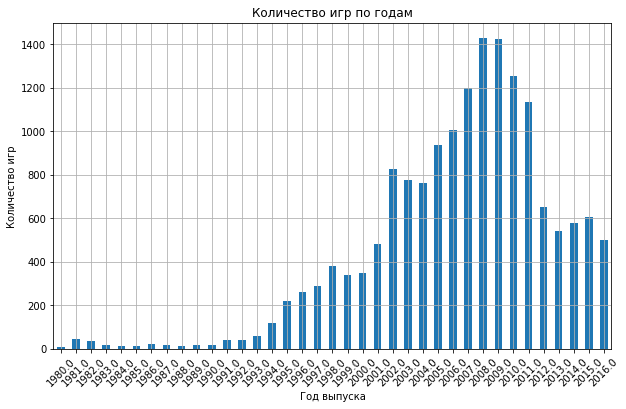

In [23]:
games_per_year = data['year_of_release'].value_counts().sort_index()
games_per_year.plot(kind='bar', grid = True, figsize=(10, 6))
plt.title('Количество игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.xticks(rotation=45)
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошая визуализация и правильно, что оси подписаны и есть название графика.</font>

Заметим, что после 2000 года выпуск игр значительно увеличился, что может свидетельствовать о увеличении попуярности игр

Пик выпуска игр приходится на 2008 и 2009 годы

In [24]:
games_per_year.describe()

count      37.000000
mean      444.351351
std       451.548399
min         9.000000
25%        36.000000
50%       338.000000
75%       762.000000
max      1427.000000
Name: year_of_release, dtype: float64

Не будем рассматривать года, за которые количество выпущенных игр меньше чем первый квартиль

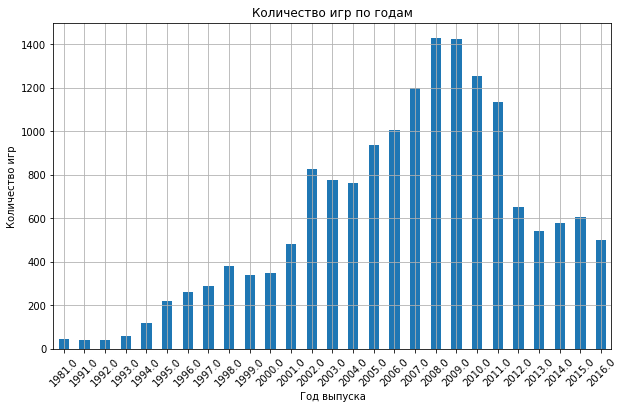

In [25]:
games_per_year_valuable = games_per_year[games_per_year > np.percentile(games_per_year, 25)]
games_per_year_valuable.plot(kind='bar', grid = True, figsize=(10, 6))
plt.title('Количество игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.xticks(rotation=45)
plt.show()

In [26]:
data_valuable = data[data['year_of_release'].isin(games_per_year_valuable.index)]

#### Посмотрим, как менялись продажи по платформам

Посчитаем количество продаж на каждой платформе

In [27]:
platform_sales = data_valuable.pivot_table(index = 'platform', values = 'total_sales',  
                                  aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)
platform_sales

,total_sales
platform,
PS2,1233.56
X360,959.99
PS3,931.33
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Заметим, что между платформой PS и PS4 существенный разрыв, поэтому выберем первые 6 самых популярных платформ

In [28]:
platform_sales_list = platform_sales.head(6).index
platform_sales_list

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype='object', name='platform')

Построим распределение по годам для каждой платформы из списка

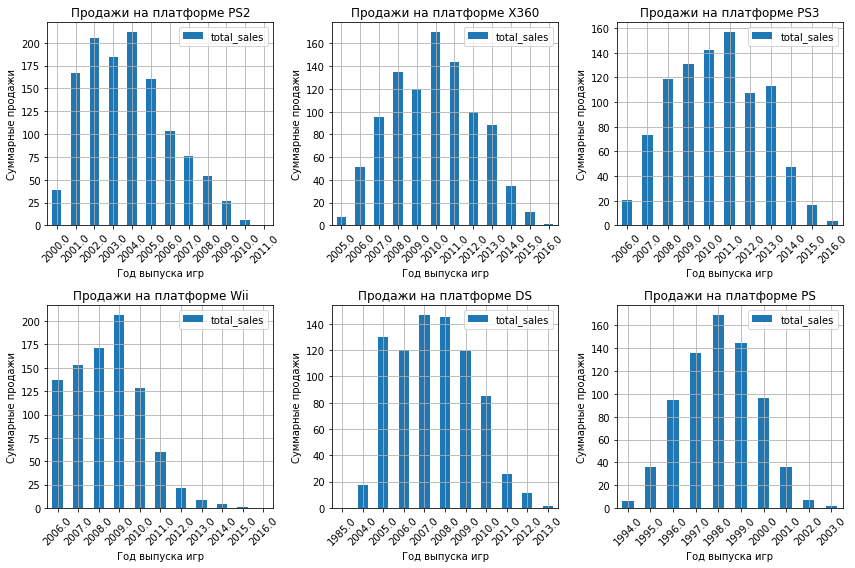

In [29]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8)) 
axes = axes.flatten()
for i, platform in enumerate(platform_sales_list):  
    image_platform = data[data['platform'] == platform].pivot_table(index='year_of_release', 
                                                                    values='total_sales', aggfunc='sum')
    image_platform.plot(kind='bar', ax=axes[i], grid=True) 
    axes[i].set_title(f"Продажи на платформе {platform}")
    axes[i].set_xlabel('Год выпуска игр')
    axes[i].set_ylabel('Суммарные продажи')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Заметим, что значимая часть продаж на каждой платформе происходит за 10-11 лет, снижаясь во второй половине "жизни"

Пик продаж на каждой из платформ приходится на время 4-6 лет посля появления

Найдены топ-6 самых популярных платформ по продажам игр

In [30]:

temp = data.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

#### Определение актуального периода

* Платформы, которые к 2016 году уже исчерпали жизненный цикл, могут не быть актуальны для прогноза на 2017 год. Под такое описание подходят все самые популярные по продажам платформы. Их вытесняют более новые 


* Для прогноза на 2017 год целесообразно сфокусироваться на данных с 2012 по 2016 годы. Эти данные наиболее релевантны, поскольку:
    1. В этот период выпущены платформы, которые продолжат быть популярными в 2017 году
    2. Продажи на этих платформах ещё не достигли пика и, вероятно, будут расти или оставаться на высоком уровне

#### Исследование актуальных платформ

Отфильтруем данные и оставим только данные за 2012 - 2016 года

In [31]:
data_valuable = data_valuable[data_valuable['year_of_release'].isin([2012, 2013, 2014, 2015, 2016])]

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно выбран актуальный период. 👍 Сейчас в наше динамичное время в бизнесе уже используются для прогноза периоды в 2-3 года.</font>

Посчитаем количество продаж на каждой платформе

In [32]:
valuable_platform_sales = data_valuable.pivot_table(index = 'platform', values = 'total_sales',  
                                  aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)
valuable_platform_sales_list = valuable_platform_sales.head(8).index
valuable_platform_sales

,total_sales
platform,
PS4,314.14
PS3,288.78
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.57
PSV,49.18
Wii,35.37


Построим распределение по годам для 8-ми самых популярных платформ

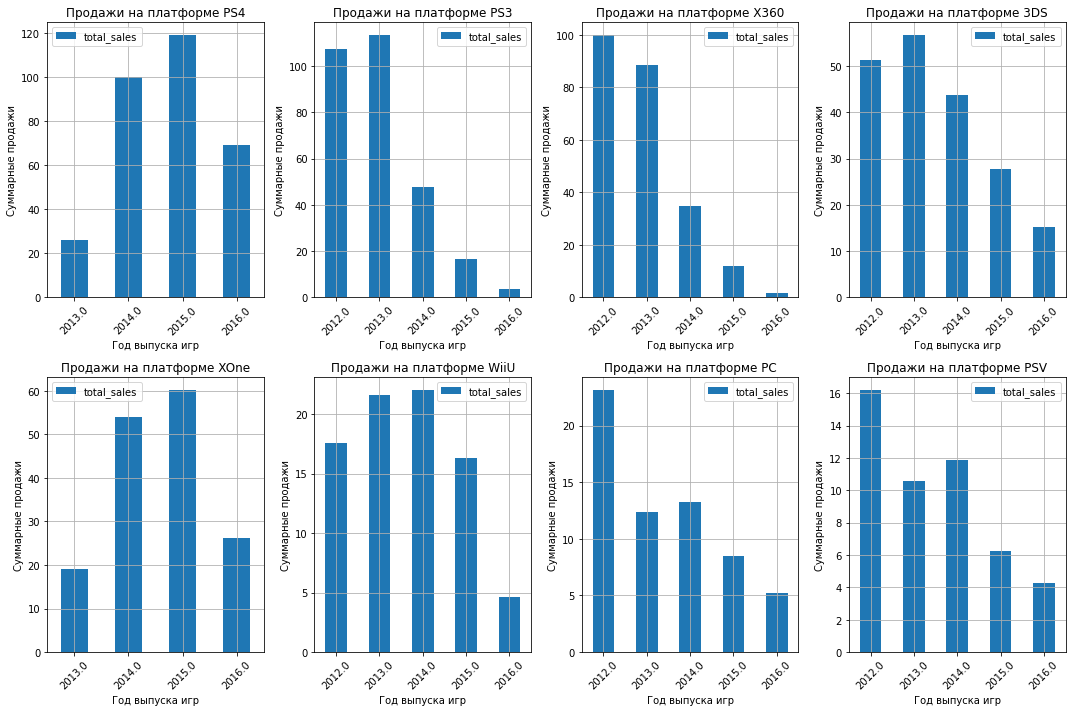

In [33]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10)) 
axes = axes.flatten()
for i, platform in enumerate(valuable_platform_sales_list):  
    image_platform = data_valuable[data_valuable['platform'] == platform].pivot_table(index='year_of_release', 
                                                                    values='total_sales', aggfunc='sum')
    image_platform.plot(kind='bar', ax=axes[i], grid=True) 
    axes[i].set_title(f"Продажи на платформе {platform}")
    axes[i].set_xlabel('Год выпуска игр')
    axes[i].set_ylabel('Суммарные продажи')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Заметим, что такие платформы как: PS3 и X360 полностью теряют свою актуальность и заменяются PS4 и XOne

В то же время продажи игр на PS4 и XOne будут потенциально прибыльными

Продажи на платформах 3DS, WiiU, PC, PSV падают на глобальном рынке, но все еще могут оказаться значительными в 2017 году (т.к. данные за 2016 год могут быть неполными, трудно сказать точнее)

#### График «ящик с усами» по глобальным продажам игр в разбивке по платформам

Построим график для каждой платформы

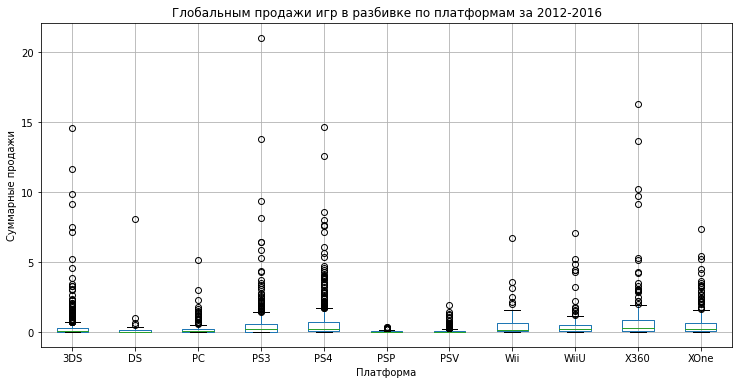

In [35]:
data_valuable.boxplot(column='total_sales', by='platform',figsize=(12, 6))
plt.title('Глобальным продажи игр в разбивке по платформам за 2012-2016')
plt.suptitle('')  # Убираем дублирующий заголовок
plt.ylabel('Суммарные продажи')
plt.xlabel('Платформа')
plt.show()

РАссмотрим данные более подробно

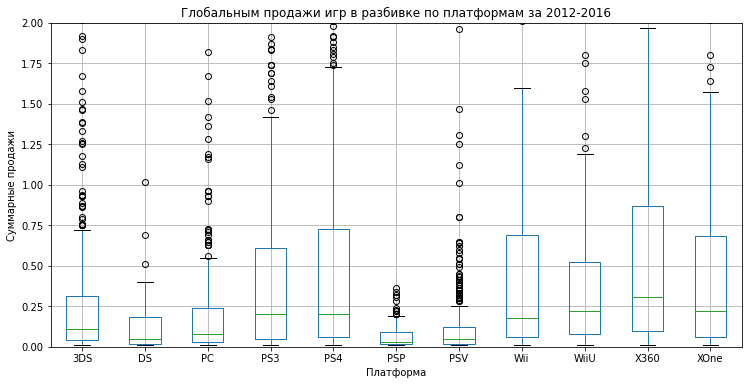

In [36]:
data_valuable.boxplot(column='total_sales', by='platform',figsize=(12, 6))
plt.title('Глобальным продажи игр в разбивке по платформам за 2012-2016')
plt.suptitle('')
plt.ylabel('Суммарные продажи')
plt.xlabel('Платформа')
plt.ylim(0, 2)
plt.show()

Медиана  у всех платформ расположена в нижней части 'ящика', что указывает на то, что большинство игр находится на низком уровне продаж, а большие продажи встречаются реже

Платформы с большими выбросами имеют большое количество игр с очень высокими продажами по сравнению со всеми. Это видно на платформах PS4 и 3DS

Хоть PS3, Wii, X360 имеют своих преемников, но догнать по продажам получилость только у PS4

PS4 и XOne - платформы с самыми высокими уровнями продаж

Платформы PS4, XOne и WiiU показывают более длинный 'Ящик'по сравнению с другими. Это говорит о том, что для этих платформ были как высокоуспешные, так и менее успешные игры

Портативные консоли такие, как 3DS, DS, PSP и PSV имеют более узкие ящики глобальных продаж по сравнению с полноценными консолями, что говорит о низких продажых игр для плафформ

График показывает, что платформы PS4 и XOne доминировали по объему глобальных продаж игр, в то время как портативные консоли и PC являются аутсайдерами

#### Посмотрим, как влияют на продажи внутри самой популярной платформы отзывы пользователей и критиков

Отфильтруем данные только для платформы PS4

In [37]:
data_ps4 = data_valuable[data_valuable['platform'] == "PS4"]

Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами

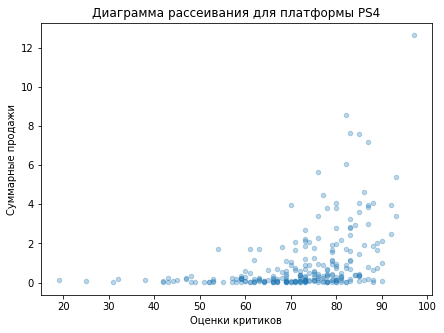

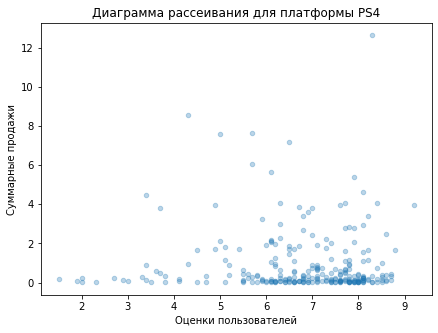

<Figure size 432x288 with 0 Axes>

In [38]:

data_ps4.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(7, 5))
plt.xlabel('Оценки критиков')
plt.ylabel('Суммарные продажи')
plt.title('Диаграмма рассеивания для платформы PS4')
plt.show()

data_ps4.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(7, 5))
plt.xlabel('Оценки пользователей')
plt.ylabel('Суммарные продажи')
plt.title('Диаграмма рассеивания для платформы PS4')
plt.show()

plt.tight_layout()
plt.show()

Рассчитываем корреляцию между оценками критиков, оценками пользователей и продажами

In [39]:
data_ps4_corr= data_ps4.copy()

data_ps4_corr.loc[:, 'critic_score'] = pd.to_numeric(data_ps4_corr['critic_score'], errors='coerce')
data_ps4_corr.loc[:, 'user_score'] = pd.to_numeric(data_ps4_corr['user_score'], errors='coerce')
data_ps4_corr.loc[:, 'total_sales'] = pd.to_numeric(data_ps4_corr['total_sales'], errors='coerce')
data_ps4_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 31 to 16314
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             392 non-null    object 
 1   platform         392 non-null    object 
 2   year_of_release  392 non-null    float64
 3   genre            392 non-null    object 
 4   na_sales         392 non-null    float64
 5   eu_sales         392 non-null    float64
 6   jp_sales         392 non-null    float64
 7   other_sales      392 non-null    float64
 8   critic_score     252 non-null    Int64  
 9   user_score       257 non-null    float64
 10  rating           392 non-null    object 
 11  total_sales      392 non-null    float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 40.2+ KB


In [40]:
# Комментарий ревьюера
print(len(data_valuable.dropna(subset=['user_score'])))
print(len(data_valuable.dropna(subset=['critic_score'])))
print(len(data_valuable.dropna(subset=['user_score', 'critic_score'])))

1529
1310
1295


In [41]:
user_corr = data_ps4_corr['user_score'].corr(data_ps4_corr['total_sales'])

data_ps4_corr= data_ps4.dropna(subset=['critic_score']).copy()
data_ps4_corr.loc[:, 'critic_score'] = pd.to_numeric(data_ps4_corr['critic_score'], errors='coerce').astype(int)
critic_corr = data_ps4_corr['critic_score'].corr(data_ps4_corr['total_sales'])
critic_corr, user_corr

(0.40656790206178095, -0.031957110204556376)

Корреляция между оценками критиков и суммарными продажами на PS4 составляет 0.4. Это указывает на умеренную положительную зависимость между оценками критиков и продажами. То есть, чем выше оценка критиков, тем выше вероятность, что игра будет иметь более высокие продажи на платформе 

Корреляция между оценками пользователей и суммарными продажами на PS4 составляет -0.03, что говорит об отсутствии значимой зависимости между оценками пользователей и продажами. Это может означать, что оценка пользователей имеет меньшее влияние на решения о покупке игр

**Посмотрим, как влияют на продажи отзывы пользователей и критиков на XOne**

Отфильтруем данные только для платформы XOne

In [42]:
data_xone = data_valuable[data_valuable['platform'] == "XOne"]

Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами

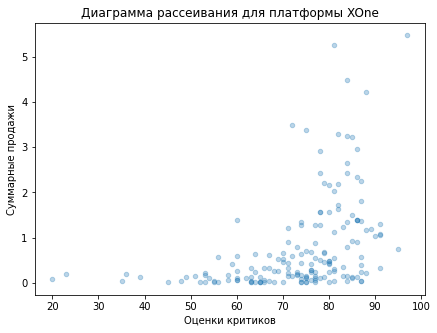

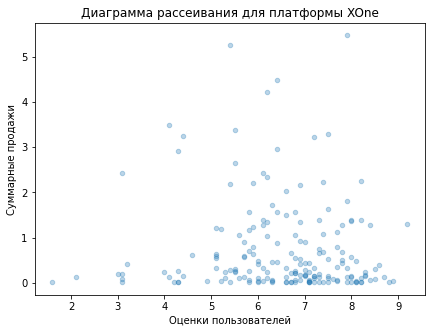

<Figure size 432x288 with 0 Axes>

In [43]:

data_xone.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(7, 5))
plt.xlabel('Оценки критиков')
plt.ylabel('Суммарные продажи')
plt.title('Диаграмма рассеивания для платформы XOne')
plt.show()

data_xone.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(7, 5))
plt.xlabel('Оценки пользователей')
plt.ylabel('Суммарные продажи')
plt.title('Диаграмма рассеивания для платформы XOne')
plt.show()

plt.tight_layout()
plt.show()

Рассчитываем корреляцию между оценками критиков, оценками пользователей и продажами

In [44]:
data_xone_corr= data_xone.copy()

data_xone_corr.loc[:, 'critic_score'] = pd.to_numeric(data_xone_corr['critic_score'], errors='coerce')
data_xone_corr.loc[:, 'user_score'] = pd.to_numeric(data_xone_corr['user_score'], errors='coerce')
data_xone_corr.loc[:, 'total_sales'] = pd.to_numeric(data_xone_corr['total_sales'], errors='coerce')
data_xone_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 99 to 16401
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             247 non-null    object 
 1   platform         247 non-null    object 
 2   year_of_release  247 non-null    float64
 3   genre            247 non-null    object 
 4   na_sales         247 non-null    float64
 5   eu_sales         247 non-null    float64
 6   jp_sales         247 non-null    float64
 7   other_sales      247 non-null    float64
 8   critic_score     169 non-null    Int64  
 9   user_score       182 non-null    float64
 10  rating           247 non-null    object 
 11  total_sales      247 non-null    float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 25.3+ KB


In [45]:
user_corr = data_xone_corr['user_score'].corr(data_xone_corr['total_sales'])

data_xone_corr= data_xone.dropna(subset=['critic_score']).copy()
data_xone_corr.loc[:, 'critic_score'] = pd.to_numeric(data_xone_corr['critic_score'], errors='coerce').astype(int)
critic_corr = data_xone_corr['critic_score'].corr(data_xone_corr['total_sales'])
critic_corr, user_corr

(0.4169983280084017, -0.06892505328279414)

Корреляция между оценками критиков и суммарными продажами на XOne составляет 0.41. Что почти овпадает с зависимостью между оценками критиков и продажами на платформе PS4

Корреляция между оценками пользователей и суммарными продажами на XOne составляет -0.07, что говорит об отсутствии значимой зависимости между оценками пользователей и продажами. Корреляция почти совпадает с зависимостью между оценками критиков и продажами на платформе PS4

**Посмотрим, как влияют на продажи отзывы пользователей и критиков на PS3**

Отфильтруем данные только для платформы PS3

In [46]:
data_ps3 = data_valuable[data_valuable['platform'] == "PS3"]

Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами

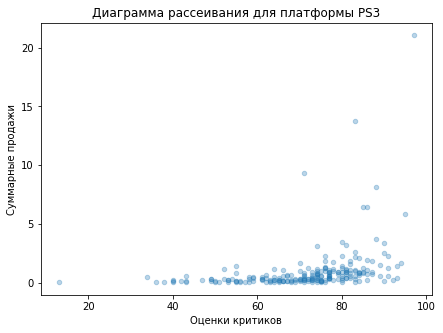

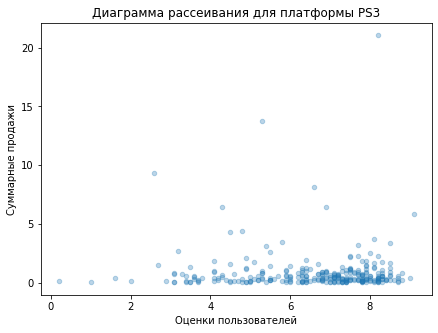

<Figure size 432x288 with 0 Axes>

In [47]:

data_ps3.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(7, 5))
plt.xlabel('Оценки критиков')
plt.ylabel('Суммарные продажи')
plt.title('Диаграмма рассеивания для платформы PS3')
plt.show()

data_ps3.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(7, 5))
plt.xlabel('Оценки пользователей')
plt.ylabel('Суммарные продажи')
plt.title('Диаграмма рассеивания для платформы PS3')
plt.show()

plt.tight_layout()
plt.show()

Рассчитываем корреляцию между оценками критиков, оценками пользователей и продажами

In [48]:
data_ps3_corr= data_ps3.copy()

data_ps3_corr.loc[:, 'critic_score'] = pd.to_numeric(data_ps3_corr['critic_score'], errors='coerce')
data_ps3_corr.loc[:, 'user_score'] = pd.to_numeric(data_ps3_corr['user_score'], errors='coerce')
data_ps3_corr.loc[:, 'total_sales'] = pd.to_numeric(data_ps3_corr['total_sales'], errors='coerce')
data_ps3_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 16 to 16439
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             492 non-null    object 
 1   platform         492 non-null    object 
 2   year_of_release  492 non-null    float64
 3   genre            492 non-null    object 
 4   na_sales         492 non-null    float64
 5   eu_sales         492 non-null    float64
 6   jp_sales         492 non-null    float64
 7   other_sales      492 non-null    float64
 8   critic_score     213 non-null    Int64  
 9   user_score       282 non-null    float64
 10  rating           492 non-null    object 
 11  total_sales      492 non-null    float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 50.4+ KB


In [49]:
user_corr = data_ps3_corr['user_score'].corr(data_ps3_corr['total_sales'])

data_ps3_corr=data_ps3.dropna(subset=['critic_score']).copy()
data_ps3_corr.loc[:, 'critic_score'] = pd.to_numeric(data_ps3_corr['critic_score'], errors='coerce').astype(int)
critic_corr = data_ps3_corr['critic_score'].corr(data_ps3_corr['total_sales'])
critic_corr, user_corr

(0.3341517575509856, -0.006205767686051523)

Корреляция между оценками критиков и суммарными продажами на PS3 составляет 0.34. Это указывает на несильную положительную зависимость между оценками критиков и продажами

Корреляция между оценками пользователей и суммарными продажами на XOne составляет -0.007, что говорит об отсутствии значимой зависимости между оценками пользователей и продажами. 

Корреляция между оценками критиков и суммарными продажами на консолях явялется слабой положительной, а  корреляция между оценками пользователей и суммарными продажами отсутсвтует

**Посмотрим, как влияют на продажи отзывы пользователей и критиков на PC**

Отфильтруем данные только для платформы PC

In [50]:
data_pc = data_valuable[data_valuable['platform'] == "PC"]

Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами

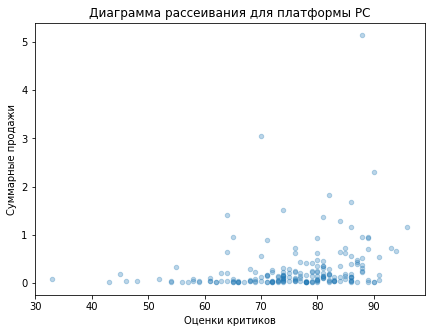

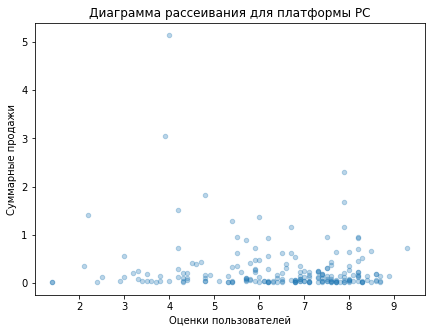

<Figure size 432x288 with 0 Axes>

In [51]:

data_pc.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(7, 5))
plt.xlabel('Оценки критиков')
plt.ylabel('Суммарные продажи')
plt.title('Диаграмма рассеивания для платформы PC')
plt.show()

data_pc.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(7, 5))
plt.xlabel('Оценки пользователей')
plt.ylabel('Суммарные продажи')
plt.title('Диаграмма рассеивания для платформы PC')
plt.show()

plt.tight_layout()
plt.show()

Рассчитываем корреляцию между оценками критиков, оценками пользователей и продажами

In [52]:
data_pc_corr= data_pc.dropna(subset=['critic_score']).copy()

data_pc_corr.loc[:, 'critic_score'] = pd.to_numeric(data_pc_corr['critic_score'], errors='coerce').astype(int)
data_pc_corr.loc[:, 'user_score'] = pd.to_numeric(data_pc_corr['user_score'], errors='coerce')
data_pc_corr.loc[:, 'total_sales'] = pd.to_numeric(data_pc_corr['total_sales'], errors='coerce')
data_pc_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 191 to 16421
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             197 non-null    object 
 1   platform         197 non-null    object 
 2   year_of_release  197 non-null    float64
 3   genre            197 non-null    object 
 4   na_sales         197 non-null    float64
 5   eu_sales         197 non-null    float64
 6   jp_sales         197 non-null    float64
 7   other_sales      197 non-null    float64
 8   critic_score     197 non-null    int64  
 9   user_score       196 non-null    float64
 10  rating           197 non-null    object 
 11  total_sales      197 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 20.0+ KB


In [53]:
critic_corr = data_pc_corr['critic_score'].corr(data_pc_corr['total_sales'])
user_corr = data_pc_corr['user_score'].corr(data_pc_corr['total_sales'])

critic_corr, user_corr

(0.23871145075973382, -0.13505469037844287)

Корреляция между оценками критиков и суммарными продажами на PC составляет 0.24. Это значит, что оценки критиков влияют на продажи игр слабее чем на консолях

Корреляция между оценками пользователей и суммарными продажами на PC составляет -0.13, что говорит об отсутствии значимой зависимости между оценками пользователей и продажами

#### Посмотрим на общее распределение игр по жанрам и их продажам

</font><font color='Blue'><b>Сверху убрал фильтрацию по платформам</b></font><br>

,total_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.06
Misc,85.04
Platform,61.00
Racing,53.42
Fighting,44.49
Simulation,35.12


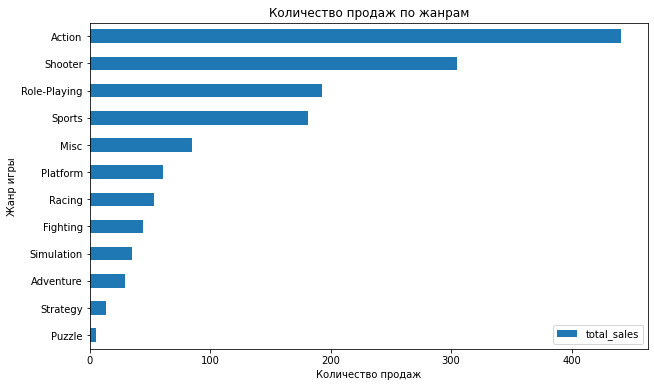

In [54]:
genre_sales = data_valuable.pivot_table(index='genre', values='total_sales', 
                                        aggfunc='sum').sort_values(by ='total_sales', ascending = True)
display(genre_sales.sort_values(by ='total_sales', ascending = False))
genre_sales.plot.barh(figsize=(10, 6))
plt.title('Количество продаж по жанрам')
plt.xlabel('Количество продаж')
plt.ylabel('Жанр игры')
plt.show()

* Самые прибыльные жанры:

    * Action и Shooter занимают лидирующие позиции. Эти жанры значительно превосходят остальные по количеству продаж. Это связано с их популярностью среди широкой аудитории, а также с выпуском крупных франшиз 
    * Role-Playing также занимает высокую позицию


* Жанры с низкими продажами:

    * Жанры, такие как Strategy, Puzzle, и Adventure, демонстрируют значительно более низкие показатели продаж. Это может быть связано с более узкой аудиторией и меньшим количеством крупных игр в этих жанрах

#### Построим диаграммы размаха по продажам для каждого жанра

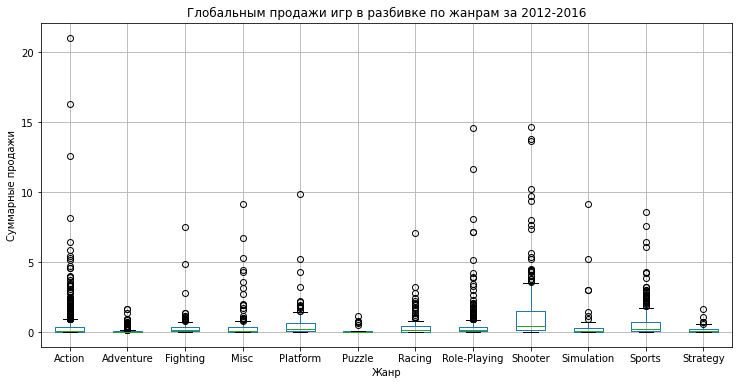

In [55]:
data_valuable.boxplot(column='total_sales', by='genre',figsize=(12, 6))
plt.title('Глобальным продажи игр в разбивке по жанрам за 2012-2016')
plt.suptitle('')
plt.ylabel('Суммарные продажи')
plt.xlabel('Жанр')
plt.show()

Рассмотрим данные более подробно

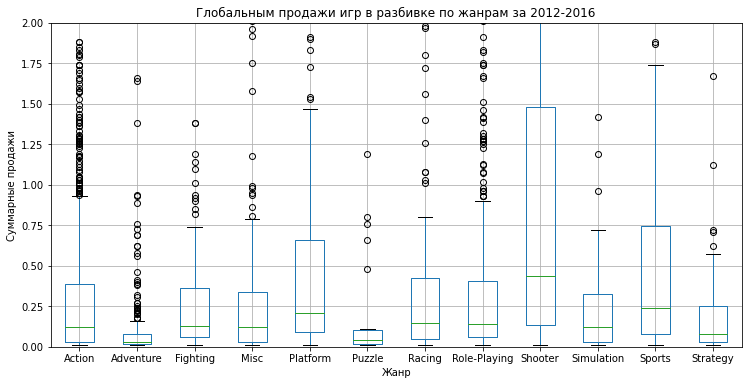

In [56]:
data_valuable.boxplot(column='total_sales', by='genre',figsize=(12, 6))
plt.title('Глобальным продажи игр в разбивке по жанрам за 2012-2016')
plt.suptitle('')
plt.ylabel('Суммарные продажи')
plt.xlabel('Жанр')
plt.ylim(0, 2)
plt.show()

+ Shooter демонстрирует наивысшие медианные продажи среди всех представленных категорий
Диапазон значений внутри квартилей довольно большой, что означает наличие как крайне успешных, так и менее популярных игр в этом жанре
Верхние "усы" расположеныы выше, чем  других жанров, и имеется много выбросов. Это говорит о том, что некоторые игры из этого жанра достигают огромного успеха

+ Platform и Sports имеют второй по величине медианный показатель. "Ящик" показывает, что в жанрах также присутствует большой разброс, но не такой выраженный, как у шутеров.

+ Медианные продажи Action и Role-Playing находятся не так высоко, но обилие выбросов указывает на значительные различия в успехе отдельных игр. Эти жанры показывают более стабильные продажи

+ Медианные продажи Puzzle Strategy и Advunture заметно ниже, чем у большинства жанров, и нет существенных выбросов.
Это может говорить о нишевой аудитории, ориентированной на специфические проекты которые привлекают небольшое, но стабильное число покупателей.


#### Выводы

* Продолжительноть "жизни" платформ (кроме PC, т.к. она является универсальной) обычно составляет 10 лет

* Пик продаж на каждой из платформ приходится на время 4-6 лет посля появления

* Найдены самые популярные платформы по продажам игр

* Для прогноза на 2017 год нужно опираться на данные с 2012 по 2016 годы.

* Потенциально самыми прибыльными платформами являются PS4 и XOne 

* Продажи на платформах 3DS, WiiU и PC падают, но все еще могут оказаться значительными в 2017 году

* Action и Shooter значительно превосходят остальные по количеству продаж. Это связано с их популярностью среди широкой аудитории, однако медианные продажи Action, что говорит о популярности жанра благодаря крупными сериям игр

* Жанры, такие как Strategy, Puzzle, и Adventure, демонстрируют значительно более низкие показатели продаж. Это может быть связано с более узкой аудиторией и меньшим количеством крупных игр в этих жанрах их медианные продажи так же являются самыми низкими

* Хоть жанры Platform и Sports имеют не самый высокий обьем продаж, но они имеют некоторое количество стабильно прдаваемых игр и устойчивую базу поклонников

###  Шаг 4. Портрет пользователя каждого региона

#### Самые популярные платформы (топ-5)

In [57]:
data_valuable.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


In [58]:
data_valuable['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

Удалим данные об играх с платформ 'PS3', 'X360', 'DS', 'Wii', т.к. у них есть новое поколение приставок

In [59]:
delete_list = ['PS3', 'X360', 'DS', 'Wii']
port_data_valuable = data_valuable[~data_valuable['platform'].isin(delete_list)]
port_data_valuable['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'PSP'], dtype=object)

Сгруппируем данные для каждого региона и посмотрим, какую часть продаж составляет каждая платформа

In [61]:
na_platform_data = port_data_valuable.pivot_table(index = 'platform', values = 'na_sales',
                                                  aggfunc = 'sum').sort_values(by ='na_sales', ascending = False)
eu_platform_data = port_data_valuable.pivot_table(index = 'platform', values = 'eu_sales',
                                                  aggfunc = 'sum').sort_values(by ='eu_sales', ascending = False)
jp_platform_data = port_data_valuable.pivot_table(index = 'platform', values = 'jp_sales',
                                                  aggfunc = 'sum').sort_values(by ='jp_sales', ascending = False)

In [62]:
def process_platform(data, region):
    top_5 = data.head(5)
    other = pd.DataFrame(data[5:].sum()).T 
    other.index = ['Другие']  
    return pd.concat([top_5, other])  
na_platform_data = process_platform(na_platform_data, 'na_sales')
eu_platform_data = process_platform(eu_platform_data, 'eu_sales')
jp_platform_data = process_platform(jp_platform_data, 'jp_sales')

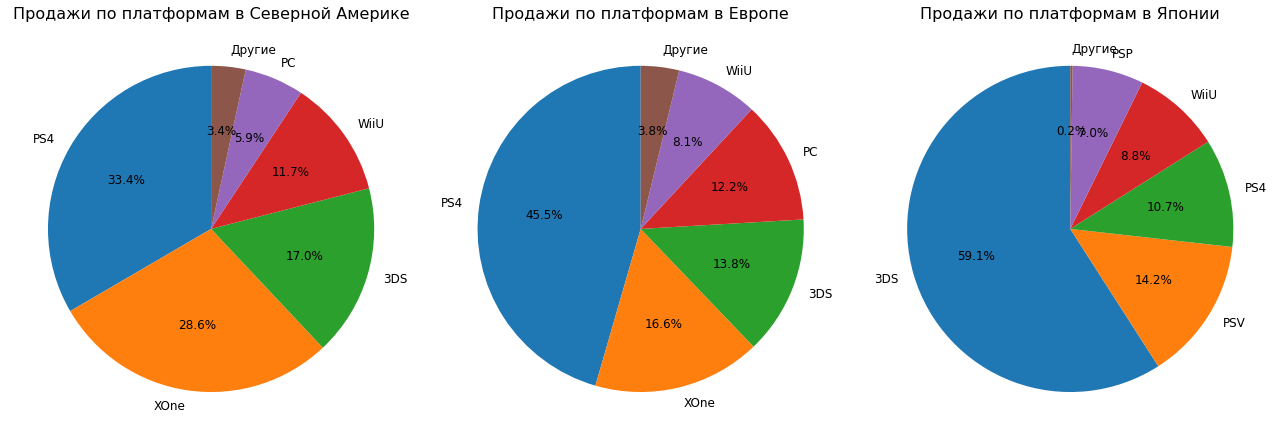

In [63]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].pie(na_platform_data['na_sales'], labels=na_platform_data.index, autopct='%1.1f%%', startangle=90,
            textprops=dict(fontsize=12))
axes[0].set_title('Продажи по платформам в Северной Америке', fontsize=16)

axes[1].pie(eu_platform_data['eu_sales'], labels=eu_platform_data.index, autopct='%1.1f%%', startangle=90,
            textprops=dict(fontsize=12))
axes[1].set_title('Продажи по платформам в Европе', fontsize=16)

axes[2].pie(jp_platform_data['jp_sales'], labels=jp_platform_data.index, autopct='%1.1f%%', startangle=90, 
           textprops=dict(fontsize=12))
axes[2].set_title('Продажи по платформам в Японии', fontsize=16)

plt.tight_layout()
plt.show()

1. Северная Америка 
    + PS4 лидирует на рынке с большой долей, однако её преимущество не столь значительное по сравнению с Европой
    + XOne очень близка к PS4 по доле продаж, что показывает популярность этой платформы 
    + WiiU и 3DS имеет меньшую, но заметную долю продаж
    + PC значительно отстают по долям
2. Европа 
    + PS4 абсолютный лидер в Европе, с гораздо большим отрывом от других платформ, чем в Северной Америке
    + XOne хотя занимает второе место, её доля в Европе значительно меньше, чем в Северной Америке
    + Доля PC выше, чем в Северной Америке, что может свидетельствовать о большей популярности игр на PC в Европе
    + WiiU и 3DS остаются на последних местах, с небольшими долями
3. Япония 
    + 3DS внезапный лидер на японском рынке, что отражает популярность портативных консолей в Японии
    + PSV имеет значительную долю, но уступает 3DS
    + PS4 также популярна в Японии, занимая третье место, что значительно отличается от её позиций в Европе и СЕверной Амреике
    + XOne и PC практически отсутствуют на рынке, что указывает на отсутствие интереса к этим платформам в Японии

PS4: Лидирует в Европе и Северной Америке

XOne: Почти наравне с PS4 в Северной Америке, но значительно уступает в Европе и практически отсутствует в Японии

3DS и PSV: Лидер на японском рынке, где портативные устройства чрезвычайно популярны, но отсутствует в Северной Америке и Европе

PC: Более популярна в Европе, чем в Северной Америке и почти отсутствует в Японии

WiiU: Имеет заметную долю во всех регионах

#### Самые популярные жанры (топ-5)

Сгруппируем данные для каждого региона и посмотрим, какую часть продаж составляет каждый жанр

In [64]:
na_genre_data = data_valuable.pivot_table(index = 'genre', values = 'na_sales',
                                                  aggfunc = 'sum').sort_values(by ='na_sales', ascending = False)

eu_genre_data = data_valuable.pivot_table(index = 'genre', values = 'eu_sales',
                                                  aggfunc = 'sum').sort_values(by ='eu_sales', ascending = False)

jp_genre_data = data_valuable.pivot_table(index = 'genre', values = 'jp_sales',
                                                  aggfunc = 'sum').sort_values(by ='jp_sales', ascending = False)


Создадим функцию для обьединения строк в одну

In [65]:
def process_genre(data, region):
    top_5 = data.head(5)
    other = pd.DataFrame(data[5:].sum()).T 
    other.index = ['Другие']  
    return pd.concat([top_5, other])  
na_genre_data = process_genre(na_genre_data, 'na_sales')
eu_genre_data = process_genre(eu_genre_data, 'eu_sales')
jp_genre_data = process_genre(jp_genre_data, 'jp_sales')

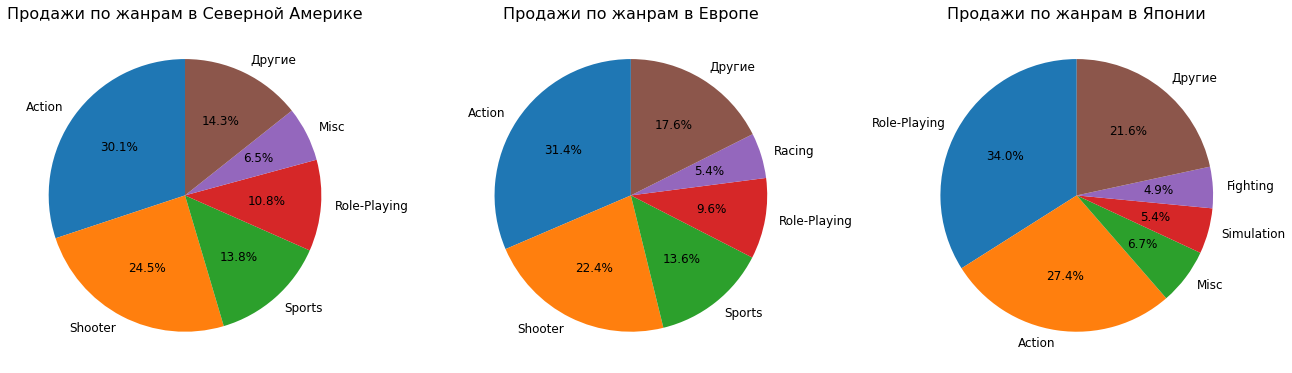

In [66]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].pie(na_genre_data['na_sales'], labels=na_genre_data.index, autopct='%1.1f%%', startangle=90,
            textprops=dict(fontsize=12))
axes[0].set_title('Продажи по жанрам в Северной Америке', fontsize=16)

axes[1].pie(eu_genre_data['eu_sales'], labels=eu_genre_data.index, autopct='%1.1f%%', startangle=90,
            textprops=dict(fontsize=12))
axes[1].set_title('Продажи по жанрам в Европе', fontsize=16)

axes[2].pie(jp_genre_data['jp_sales'], labels=jp_genre_data.index, autopct='%1.1f%%', startangle=90, 
           textprops=dict(fontsize=12))
axes[2].set_title('Продажи по жанрам в Японии', fontsize=16)

plt.tight_layout()
plt.show()

1. Северная Америка 
    + Action и Shooter занимают лидирующие позиции с примерно равными долями, что отражает высокую популярность динамичных игр
    + Sports также популярны в Северной Америке, но занимают менее заметное место
    + Role-Playing занимает 4 место, что довольно немало
    + Misc менее распространён

2. Европа 
    + Action лидирует по продажам, как и в Северной Америке
    + Shooter очень популярен, но в Европе их доля меньше, чем в Северной Америке
    + Sports также популярны в в Европе, как и в Северной Америке
    + Role-Playing в Европе занимают четвёртое место
    + Racing Являются заметным, но менее популярным жанром

3. Япония 
    + Role-Playing доминирует в Японии с больше чем третью продаж. Это связано с высокой популярностью японских ролевых игр
    + Action также популярен, но он значительно отстаёт от ролевых игр
    + Misc занимают третье место, что указывает на некоторую разнородность предпочтений японской аудитории
    + Simulation занимают более заметную позицию в Японии по сравнению с другими регионами
    + Fighting является заметным, но менее популярным жанром

Role-Playing - Абсолютные лидеры в Японии, но гораздо менее популярны в Северной Америке и Европе

Action и Shooter - Доминируют в Северной Америке и Европе, но занимают второстепенные позиции в Японии

Sports - Более популярны в Европе и Северной Америке, но практически отсутствуют в Японии

Misc и Simulation - Имеют заметную долю в Японии

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Сгруппируем данные для каждого региона и посмотрим, какую часть продаж составляет каждый рейтинг

In [67]:
na_rating_data = data_valuable.pivot_table(index = 'rating', values = 'na_sales',
                                                  aggfunc = 'sum').sort_values(by ='na_sales', ascending = False)
eu_rating_data = data_valuable.pivot_table(index = 'rating', values = 'eu_sales',
                                                  aggfunc = 'sum').sort_values(by ='eu_sales', ascending = False)
jp_rating_data = data_valuable.pivot_table(index = 'rating', values = 'jp_sales',
                                                  aggfunc = 'sum').sort_values(by ='jp_sales', ascending = False)

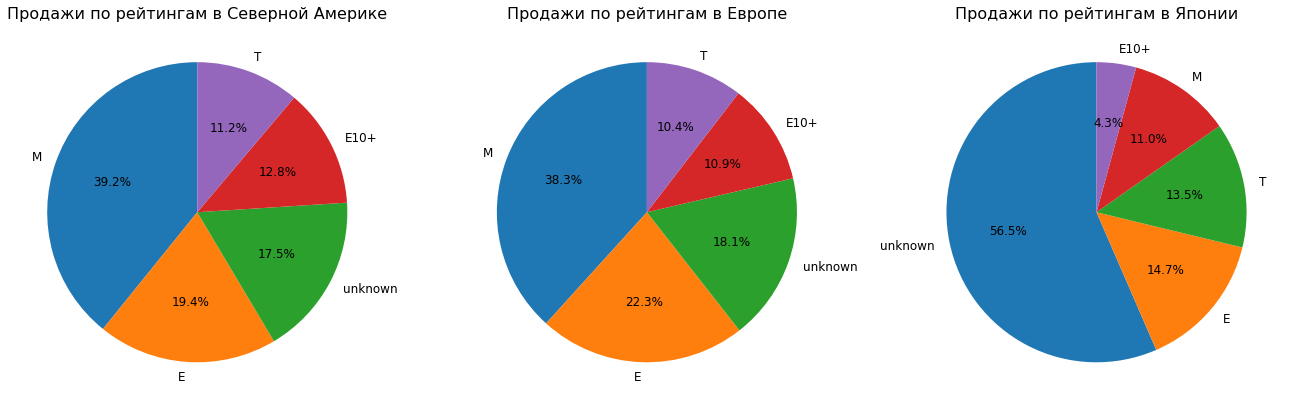

In [68]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].pie(na_rating_data['na_sales'], labels=na_rating_data.index, autopct='%1.1f%%', startangle=90,
            textprops=dict(fontsize=12))
axes[0].set_title('Продажи по рейтингам в Северной Америке', fontsize=16)

axes[1].pie(eu_rating_data['eu_sales'], labels=eu_rating_data.index, autopct='%1.1f%%', startangle=90,
            textprops=dict(fontsize=12))
axes[1].set_title('Продажи по рейтингам в Европе', fontsize=16)

axes[2].pie(jp_rating_data['jp_sales'], labels=jp_rating_data.index, autopct='%1.1f%%', startangle=90, 
           textprops=dict(fontsize=12))
axes[2].set_title('Продажи по рейтингам в Японии', fontsize=16)

plt.tight_layout()
plt.show()

1. Северная Америка 
    + (Мature, для взрослых) Игры с рейтингом «M» занимают лидирующую позицию. Это указывает на высокую популярность игр, предназначенных для более взрослой аудитории, таких как шутеры, боевики и ролевые игры
    + (Everyone, для всех) Игры для всех возрастов также имеют значительную долю, что отражает популярность семейных и спортивных игр
    + (Unknown) Третья по величине категория — это игры с неизвестным или неустановленным рейтингом. Скорее всего в эту категорию попали игры, которые не были сертифицированы или классифицированы
    + (E10+, для детей 10 лет и старше) Этот рейтинг охватывает игры, которые подходят для относительно широкой аудитории
    + (Teen, для подростков) Игры для подростков имеют самую малую долю по сравнению с другими рейтингами

2. Европа 
    + (Мature, для взрослых) Игры с рейтингом "M" также доминируют в Европе. Это говорит о схожем предпочтении более взрослого контента
    + (Everyone, для всех) Второй по популярности рейтинг. Игры для всех возрастов имеют заметную долю на рынке
    + (Unknown) "Unknown" занимает значительное место
    + (E10+, для детей 10 лет и старше) Рейтинг для детей занимает 4-ое место
    + (Teen, для подростков) Этот рейтинг имеет наименьшую популярность

3. Япония 
    + (Unknown) В Японии большинство продаж приходится на игры с неизвестным рейтингом. Это может быть связано с тем, что в Японии используется другая система рейтингов (например, CERO), и данные могли не быть сопоставлены с международной системой
    + (Everyone, для всех) Рейтинг "E" занимает второе место, что указывает на популярность игр, подходящих для всех возрастов
    + (Teen, для подростков) Игры для подростков занимают третье место в Японии, что выше, чем в Северной Америке и Европе
    + (Мature, для взрослых) В отличие от западных рынков, в Японии игры для взрослых не так популярны. Возможно, это связано с разницей в культурных предпочтениях и типах игр
    + (E10+, для детей 10 лет и старше) Игры с этим рейтингом занимают самую малую долю в Японии

Рейтинг "M": В Северной Америке и Европе он доминирует, что подчеркивает популярность более жестоких и зрелых игр. В Японии игры для взрослых не так востребованы

Рейтинг "Unknown": В Японии эта категория занимает подавляющее большинство, что может быть связано с различиями в классификационных системах или недостатком данных о рейтингах

Рейтинг "E": Этот рейтинг стабильно популярен во всех регионах

Рейтинг "E10+" и "T": В Европе, Северной Америке и Японии эти категории занимают меньшую долю

**Каждый фактор влияет на количество продаж в регионах, но в каждом из них разные предпочтения**

### Шаг 5. Проверка гипотез

#### Принцип формулирования гипотез

* Нулевая гипотеза предполагает отсутствие различий между средними значениями двух групп

* Альтернативная гипотеза формулируется как противоположность нулевой, предполагая наличие различий между средними значениями двух групп

####  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Гипотеза:** 

* H<sub>0</sub>
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

* H<sub>1</sub>
Средние пользовательские рейтинги платформ Xbox One и PC разные

Отфильтруем данные по двум платформам

In [69]:
data_valuable_pc = data_valuable[data_valuable['platform'] == "PC"].dropna(subset=['user_score'])
data_valuable_xone = data_valuable[data_valuable['platform'] == "XOne"].dropna(subset=['user_score'])

Чтобы проверить эту гипотезу, сравним средние `user_score` платформ Xbox One и PC 

Используем двусторонний t-тест для независимых выборок, так как мы сравниваем две группы

In [70]:
alpha = 0.05 # уровень статистической значимости
results = st.ttest_ind(data_valuable_pc['user_score'], data_valuable_xone['user_score'], equal_var = False)
print(f'p-value: {results.pvalue}')
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

p-value: 0.5065901030514671
Не отвергаем нулевую гипотезу


Полученное значение p-value больше заданного уровня значимости, поэтому нельзя отвергнуть нулевую гипотезу

Есть основания полагать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Это может быть выгодно для бизнеса, т.к. если игра получает одинаково высокие оценки как на Xbox One, так и на PC, это позволит сфокусироваться на общей рекламной стратегии для обеих платформ.

#### Средние пользовательские рейтинги жанров Action и Sports  разные

**Гипотеза:** 

* H<sub>0</sub>
Средние пользовательские рейтинги жанров Action и Sports одинаковые

* H<sub>1</sub>
Средние пользовательские рейтинги жанров Action и Sports  разные

Отфильтруем данные по двум жанрам

In [71]:
data_valuable_action = data_valuable[data_valuable['genre'] == "Action"].dropna(subset=['user_score'])
data_valuable_sports = data_valuable[data_valuable['genre'] == "Sports"].dropna(subset=['user_score'])

Чтобы проверить эту гипотезу, сравним средние user_score жанров Action и Sports

Используем двусторонний t-тест для независимых выборок, так как мы сравниваем две группы

In [72]:
alpha = 0.05 # уровень статистической значимости
results = st.ttest_ind(data_valuable_action['user_score'], data_valuable_sports['user_score'], equal_var = False)
print(f'p-value: {results.pvalue}')
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

p-value: 5.989458066467418e-20
Отвергаем нулевую гипотезу


Полученное значение p-value значительно меньше заданного уровня значимости, поэтому отвергаем нулевую гипотезу

Есть основания полагать, что средние пользовательские рейтинги жанров Action и Sports разные

Это может быть выгодно для бизнеса, т.к. жанры с разными пользовательскими рейтингами могут привлекать различные сегменты игроков

#### Вывод

* Нет значимых различий между средними пользовательскими рейтингами платформ Xbox One и PC. Для бизнеса это означает, что игры, выпускаемые на обеих платформах, получают схожие оценки. Это может позволить использовать единую рекламную стратегию для обеих платформ

* Существуют значимые различия между средними пользовательскими рейтингами жанров Action и Sports. Для бизнеса это означает, что жанры с различными оценками могут привлекать различные сегменты игроков. Это стоит учитывать чтобы максимально учитывать предпочтения игроков в разных жанрах

### Вывод

Проект посвящен исследованию данных интернет-магазина «Стримчик», торгующего компьютерными играми по всему миру. Основная цель — выявление факторов, определяющих успешность продаж игр, для дальнейшего планирования на 2017 год. 

1. **Описание данных**

* Набор полученных данных содержал информацию о продажах игр, оценках пользователей и критиков, а также различные характеристики игр, такие как платформа, жанр и т.д. 
* Данные охватывали период до 2016 года(неполные данные за 2016 год)

2. **Обработка пропусков и дубликатов**

* Пропуски: Невозможно было заполнить пропуски в оценках критиков и пользователей при имеющихся данных, поэтому было принято решение оставить данные как есть. Значения TBD были заменены на NaN

* Дубликаты: дублирующиеся записи удалены

3. **Предобработка данных для анализа**

    Данные были приведены к единому формату:

    * Изменены названия столбцов

    * Типы данных приведены к нужным

    * Посчитаны общие продажи по всем регионам и выделены в отднльный столбец


4. **Исследовательский анализ данных** 

* Найден средний срок жизни появляющихся платформ - около 7 лет

* Пик продаж на каждой из платформ приходится на время 4 лет посля появления

* Найдены топ-6 самых популярных платформ по продажам игр

* Платформы как PS3, X360, DS, Wii полностью теряют свою актуальность и заменяются своими преемниками

* Платформы PS4 и XOne доминировали по объему глобальных продаж игр и могут оказаться самыми прибыльными в 2017

* Портативные консоли такие, как 3DS, DS, PSP и PSV имеют более низкие глобальные продажи по сравнению с полноценными консолями

* PS4 и XOne - Являются самыми популярными платформами в Европе и Северной Америке

* Портативные консоли осоенно популярны в Японии

* Самыми популярными жанрами оказались Action и Shooter. Однако популярность жанров также различалась в зависимости от региональных предпочтени. Так, в Северной Америке и Европе самые популярные жанры это Action, Shooter и Sports, а в Японии абсолютным лидером явлется Role-Playng, хотя занимает менее заметное место в других регионах

* Рейтинг ESRB: 
    + Рейтинг "M": В Северной Америке и Европе он доминирует, что подчеркивает популярность более жестоких и зрелых игр

    + Рейтинг "E": Этот рейтинг стабильно популярен во всех регионах

* Высокие оценки критиков чаще коррелировали с коммерческим успехом игры, в то время как оценки пользователей почти не оказывали влияние

5. **Проверка гипотез**

+ Нет значимых различий между средними пользовательскими рейтингами платформ Xbox One и PC. Для бизнеса это означает, что игры, выпускаемые на обеих платформах, получают схожие оценки. Это может позволить использовать единую рекламную стратегию для обеих платформ

+ Существуют значимые различия между средними пользовательскими рейтингами жанров Action и Sports. Для бизнеса это означает, что жанры с различными оценками могут привлекать различные сегменты игроков. Это стоит учитывать чтобы максимально учитывать предпочтения игроков в разных жанрах


### Рекомендация

1. Ориентация на жанры-лидеры:

    + Бизнесу стоит сосредоточить ресурсы на развитии жанров Action, Shooter, Sports, и Role-Playing, которые занимают лидирующие позиции. Эти жанры привлекают наибольшее количество пользователей и обеспечивают значительную долю продаж


2. Региональные предпочтения:

    + В Японии акцент следует делать на Role-Playing и Action, так как эти жанры демонстрируют высокие продажи и интерес у пользователей
    + В Европе и Северной Америке фокус может быть сделан на Action и Shooter, которые лидируют в этих регионах


3. Продвижение игр с рейтингом M и E в западных рынках:

    + Учитывая популярность игр с рейтингом M и E в Северной Америке и Европе, стоит делать акцент на маркетинг именно таких игр для более взрослой аудитории.


4. Дифференциация маркетинговых стратегий по жанрам:

     + Различия в пользовательских оценках жанров Action и Sports предполагают необходимость разных подходов к маркетингу этих жанров


5. Платформы:

    + Платформа PS4 и Xone занимает доминирующее положение в западных регионах, и стоит продолжить работу под эту платформу
    + PC и WiiU тоже остаются важными
    + PC и Xbox One имеют схожие пользователские оценки, маркетинг может быть оптимизирован для этих платформ в зависимости от региональных особенностей


6. Адаптация к японскому рынку:

    + В Японии стоит обратить внимание на платформы портативных консолей и жанр Role-Playing, так как эти сегменты показывают высокие результаты и могут способствовать увеличению продаж